[0.01666666]
[9.62601645e-15]


<ipython-input-27-88b80048f411>:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


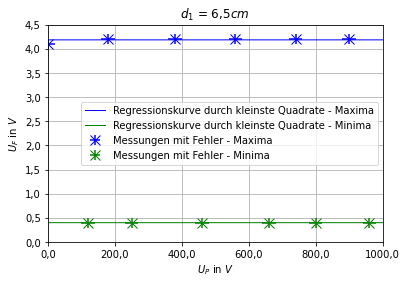

[4.18333333]
[0.4]


In [27]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker
from scipy.optimize import curve_fit
from sympy import *
from matplotlib import *

file = open("O2c_1_data.csv", encoding="charmap")
beamData = np.loadtxt(file, delimiter=",")

s = beamData[:,0].size
x_dataPos1 = []
x_dataPos2 = []
for i in range(0,s):
    if i%2 == 0:
        x_dataPos1.append(beamData[i,0])
    else:
        x_dataPos2.append(beamData[i,0])
y_dataPos1 = []
y_dataPos2 = []
for i in range(0,s):
    if i%2 == 0:
        y_dataPos1.append(beamData[i,1])
    else:
        y_dataPos2.append(beamData[i,1])
                      

    
xerr1 = [20 for i in range(0,int(s/2))]
xerr2 = [20 for i in range(0,int(s/2))]
yerr1 = [0.1 for i in range(0,int(s/2))]
yerr2 = [0.1 for i in range(0,int(s/2))]

x_dataFit = np.arange(0,1000,0.1)

#plt.plot(x_dataPos1,y_dataPos1,'.',label="Spannungsmessungen")           # Einzelne Punkte ohne Fehlerbalken
#plt.plot(x_data7,y_data7,label="pV-Kurve",linewidth=2)                        # Punkte verbunden

def fitCurve(x, B):
    return B + np.asarray(x) - np.asarray(x)

pFit1, pCov1 = curve_fit(fitCurve, x_dataPos1, y_dataPos1, p0=[4])
pFit2, pCov2 = curve_fit(fitCurve, x_dataPos2, y_dataPos2, p0=[4])
plt.plot(x_dataFit, fitCurve(x_dataFit, *pFit1), label="Regressionskurve durch kleinste Quadrate - Maxima", color="Blue",linewidth=1)
plt.plot(x_dataFit, fitCurve(x_dataFit, *pFit2), label="Regressionskurve durch kleinste Quadrate - Minima", color="Green",linewidth=1)
perr1 = np.sqrt(np.diag(pCov1))
perr2 = np.sqrt(np.diag(pCov2))
print(perr1)
print(perr2)

plt.errorbar(x_dataPos1,y_dataPos1,yerr1,xerr1,fmt='x',markersize=10,label="Messungen mit Fehler - Maxima",color="Blue")
plt.errorbar(x_dataPos2,y_dataPos2,yerr2,xerr2,fmt='x',markersize=10,label="Messungen mit Fehler - Minima",color="Green")
plt.xlabel("$U_P$ in $V$")
plt.ylabel("$U_F$ in $V$")
plt.title("$d_1$ = 6,5$cm$")
plt.axis([0,1000, 0, 4.5])
ax = plt.subplot(111)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x.round(5)).replace('.',',')))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x.round(1)).replace('.',',')))
plt.legend()
plt.grid(True)
plt.show()

print(pFit1)
print(pFit2)
#x = Symbol('x')
#A = pFit[0].round(4)
#B = pFit[1].round(4)
#fitCurve = A * x + B
#fitCurve

[ 0.03268185 19.18163198]


<ipython-input-49-0b8a144a5256>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


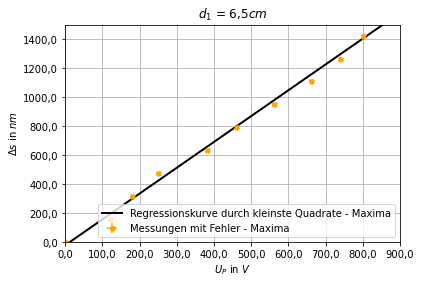

[  1.78164621 -22.2078111 ]


In [49]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker
from scipy.optimize import curve_fit
from sympy import *
from matplotlib import *

file = open("O2c_1_data.csv", encoding="charmap")
beamData = np.loadtxt(file, delimiter=",")

s = beamData[:,0].size
y_dataPos = []
y = 0
lam = 632.8
for i in range(0,s):
    y_dataPos.append(y)
    y += lam / 4
    
x_dataPos = beamData[:,0]

    
yerr = [10 for i in range(0,s)]
xerr = [5 for i in range(0,s)]

y_dataFit = np.arange(0,1500,0.1)

#plt.plot(x_dataPos1,y_dataPos1,'.',label="Spannungsmessungen")           # Einzelne Punkte ohne Fehlerbalken
#plt.plot(x_data7,y_data7,label="pV-Kurve",linewidth=2)                        # Punkte verbunden

def fitCurve(x, A, B):
    return A * np.asarray(x) + B

pFit, pCov = curve_fit(fitCurve, x_dataPos, y_dataPos, p0=[4,1])
plt.plot(x_dataFit, fitCurve(x_dataFit, *pFit), label="Regressionskurve durch kleinste Quadrate - Maxima", color="Black",linewidth=2)
perr = np.sqrt(np.diag(pCov))
print(perr)

plt.errorbar(x_dataPos,y_dataPos,yerr,xerr,fmt='X',markersize=5,label="Messungen mit Fehler - Maxima",color="Orange")
plt.ylabel("$\Delta$s in $nm$")
plt.xlabel("$U_P$ in $V$")
plt.title("$d_1$ = 6,5$cm$")
plt.axis([0,900, 0, 1500])
ax = plt.subplot(111)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x.round(5)).replace('.',',')))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x.round(1)).replace('.',',')))
plt.legend()
plt.grid(True)
plt.show()

print(pFit)
#x = Symbol('x')
#A = pFit[0].round(4)
#B = pFit[1].round(4)
#fitCurve = A * x + B
#fitCurve

[0.06]
[0.02449491]


<ipython-input-29-e995ca16660b>:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


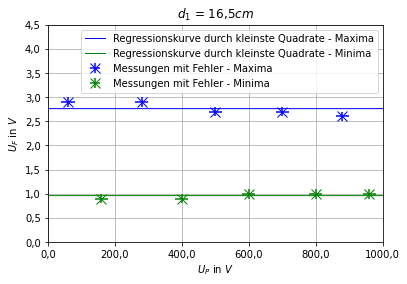

[2.76]
[0.96]


In [29]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker
from scipy.optimize import curve_fit
from sympy import *
from matplotlib import *

file = open("O2c_2_data.csv", encoding="charmap")
beamData = np.loadtxt(file, delimiter=",")

s = beamData[:,0].size
x_dataPos1 = []
x_dataPos2 = []
for i in range(0,s):
    if i%2 == 0:
        x_dataPos1.append(beamData[i,0])
    else:
        x_dataPos2.append(beamData[i,0])
y_dataPos1 = []
y_dataPos2 = []
for i in range(0,s):
    if i%2 == 0:
        y_dataPos1.append(beamData[i,1])
    else:
        y_dataPos2.append(beamData[i,1])
                      

    
xerr1 = [20 for i in range(0,int(s/2))]
xerr2 = [20 for i in range(0,int(s/2))]
yerr1 = [0.1 for i in range(0,int(s/2))]
yerr2 = [0.1 for i in range(0,int(s/2))]

x_dataFit = np.arange(0,1000,0.1)

#plt.plot(x_dataPos1,y_dataPos1,'.',label="Spannungsmessungen")           # Einzelne Punkte ohne Fehlerbalken
#plt.plot(x_data7,y_data7,label="pV-Kurve",linewidth=2)                        # Punkte verbunden

def fitCurve(x, B):
    return B + np.asarray(x) - np.asarray(x)

pFit1, pCov1 = curve_fit(fitCurve, x_dataPos1, y_dataPos1, p0=[4])
pFit2, pCov2 = curve_fit(fitCurve, x_dataPos2, y_dataPos2, p0=[4])
plt.plot(x_dataFit, fitCurve(x_dataFit, *pFit1), label="Regressionskurve durch kleinste Quadrate - Maxima", color="Blue",linewidth=1)
plt.plot(x_dataFit, fitCurve(x_dataFit, *pFit2), label="Regressionskurve durch kleinste Quadrate - Minima", color="Green",linewidth=1)
perr1 = np.sqrt(np.diag(pCov1))
perr2 = np.sqrt(np.diag(pCov2))
print(perr1)
print(perr2)

plt.errorbar(x_dataPos1,y_dataPos1,yerr1,xerr1,fmt='x',markersize=10,label="Messungen mit Fehler - Maxima",color="Blue")
plt.errorbar(x_dataPos2,y_dataPos2,yerr2,xerr2,fmt='x',markersize=10,label="Messungen mit Fehler - Minima",color="Green")
plt.xlabel("$U_P$ in $V$")
plt.ylabel("$U_F$ in $V$")
plt.title("$d_1$ = 16,5$cm$")
plt.axis([0,1000, 0, 4.5])
ax = plt.subplot(111)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x.round(5)).replace('.',',')))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x.round(1)).replace('.',',')))
plt.legend()
plt.grid(True)
plt.show()

print(pFit1)
print(pFit2)
#x = Symbol('x')
#A = pFit[0].round(4)
#B = pFit[1].round(4)
#fitCurve = A * x + B
#fitCurve

[ 0.03191723 19.42393767]


<ipython-input-47-92ea475d98c0>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


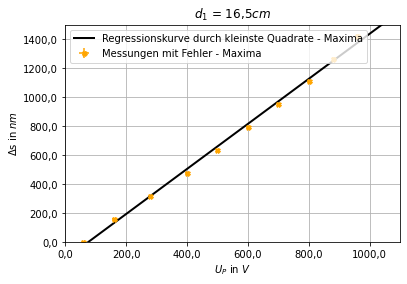

[   1.55407493 -117.97601052]


In [47]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker
from scipy.optimize import curve_fit
from sympy import *
from matplotlib import *

file = open("O2c_2_data.csv", encoding="charmap")
beamData = np.loadtxt(file, delimiter=",")

s = beamData[:,0].size
y_dataPos = []
y = 0
lam = 632.8
for i in range(0,s):
    y_dataPos.append(y)
    y += lam / 4
    
x_dataPos = beamData[:,0]

    
yerr = [10 for i in range(0,s)]
xerr = [5 for i in range(0,s)]

y_dataFit = np.arange(0,1500,0.1)

#plt.plot(x_dataPos1,y_dataPos1,'.',label="Spannungsmessungen")           # Einzelne Punkte ohne Fehlerbalken
#plt.plot(x_data7,y_data7,label="pV-Kurve",linewidth=2)                        # Punkte verbunden

def fitCurve(x, A, B):
    return A * np.asarray(x) + B

pFit, pCov = curve_fit(fitCurve, x_dataPos, y_dataPos, p0=[4,1])
plt.plot(x_dataFit, fitCurve(x_dataFit, *pFit), label="Regressionskurve durch kleinste Quadrate - Maxima", color="Black",linewidth=2)
perr = np.sqrt(np.diag(pCov))
print(perr)

plt.errorbar(x_dataPos,y_dataPos,yerr,xerr,fmt='X',markersize=5,label="Messungen mit Fehler - Maxima",color="Orange")
plt.ylabel("$\Delta$s in $nm$")
plt.xlabel("$U_P$ in $V$")
plt.title("$d_1$ = 16,5$cm$")
plt.axis([0,1100, 0, 1500])
ax = plt.subplot(111)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x.round(5)).replace('.',',')))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x.round(1)).replace('.',',')))
plt.legend()
plt.grid(True)
plt.show()

print(pFit)
#x = Symbol('x')
#A = pFit[0].round(4)
#B = pFit[1].round(4)
#fitCurve = A * x + B
#fitCurve

[0.00291975]


<ipython-input-37-d06010fb1df5>:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


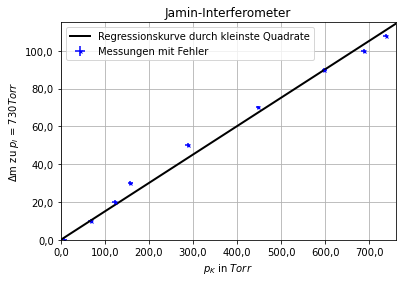

[0.15029249]


In [37]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker
from scipy.optimize import curve_fit
from sympy import *
from matplotlib import *

file = open("O2c_3_data.csv", encoding="charmap")
beamData = np.loadtxt(file, delimiter=",")

s = beamData[:,0].size
x_dataPos = []
for i in range(0,s):
    x_dataPos.append(737.7-beamData[i,0])
y_dataPos = [0,10,20,30,50,70,90,100,108]
    
xerr = [5.5 for i in range(0,s)]
yerr = [1 for i in range(0,s)]

x_dataFit = np.arange(0,800,0.1)

#plt.plot(x_dataPos,y_dataPos,'o',label="Messungen ohne Fehler", color="Orange")           # Einzelne Punkte ohne Fehlerbalken
#plt.plot(x_data7,y_data7,label="pV-Kurve",linewidth=2)                        # Punkte verbunden

def fitCurve(x, A):
    return A * np.asarray(x)

pFit, pCov = curve_fit(fitCurve, x_dataPos, y_dataPos, p0=[0.1])
plt.plot(x_dataFit, fitCurve(x_dataFit, *pFit), label="Regressionskurve durch kleinste Quadrate", color="Black",linewidth=2)
perr = np.sqrt(np.diag(pCov))
print(perr)

plt.errorbar(x_dataPos,y_dataPos,yerr,xerr,fmt='x',markersize=3,label="Messungen mit Fehler",color="Blue")
plt.xlabel("$p_K$ in $Torr$")
plt.ylabel("$\Delta$m zu $p_I$ = 730$Torr$")
plt.title("Jamin-Interferometer")
plt.axis([0,760, 0, 115])
ax = plt.subplot(111)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x.round(5)).replace('.',',')))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x.round(1)).replace('.',',')))
plt.legend()
plt.grid(True)
plt.show()

print(pFit)
#x = Symbol('x')
#A = pFit[0].round(4)
#B = pFit[1].round(4)
#fitCurve = A * x + B
#fitCurve